### 색상공간
- RGB : Red, Green, Blue로 구성된 색 공간
- CMYK : Cyan, Magenta, Yellow, Black
- HSV : Hue(색상), Saturation(채도), Value(명도)로 변환한 색공간

#### HSV
- Hue(색상값) : 0 ~ 179 범위로 설정
- Saturation(채도) : 0 ~ 255 범위 (채도값이 0에 가까우면 흰색 255에 가까울수록 H 자체의 색상이 됨) 0 = 색이빠져서 흰색
- Value(명도) : 0 ~ 255 범위 ( 0-검은색, 255에 가까울수록 H자체의 색상이 됨) 0 = 밝기가 빠져서 검은색

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

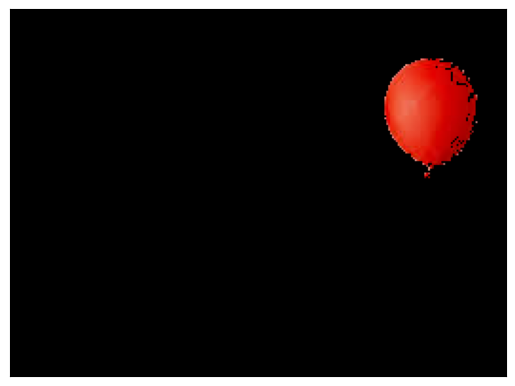

In [21]:
# 이미지 출력
# RGB를 HSV로 변환

img = cv2.imread('images/balloon.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGB를 HSV로 변환
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# 색상, 채도, 명도의 범위 값 설정
red_l = np.array([0, 100, 100])
red_u = np.array([10, 255, 255])
# 색공간 범위에 해당하는 부분 추출
mask = cv2.inRange(img2, red_l, red_u)

# 이미지와 HSV 색상 공간에 모두 있는 색상만 추출
red_img = cv2.bitwise_and(img, img, mask=mask)

plt.xticks([]), plt.yticks([])
plt.imshow(red_img)


In [17]:
# BGR 컬러로 원색 픽셀 설정
red_bgr = np.array([[[0, 0, 255]]], dtype=np.uint8) # 빨강 값만 같는 픽셀
green_bgr = np.array([[[0, 255, 0]]], dtype=np.uint8) # 초록 값만 같는 픽셀
blue_bgr = np.array([[[255, 0, 0]]], dtype=np.uint8) # 파랑 값만 같는 픽셀
yellow_bgr = np.array([[[0, 255, 255]]], dtype=np.uint8) # 노랑 값만 같는 픽셀

# BGR 컬러를 HSV로 변환
red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV)
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV)
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV)
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV)

# HSV로 변환한 픽셀 값 출력
print("red", red_hsv)
print("green", green_hsv)
print("blue", blue_hsv)
print("yellow", yellow_hsv)


red [[[  0 255 255]]]
green [[[ 60 255 255]]]
blue [[[120 255 255]]]
yellow [[[ 30 255 255]]]


#### 크로마 키 (Chroma key) 합성
- 녹색 또는 파란색 배경에서 촬영한 영상에 다른 배경 영상을 합성하는 기술

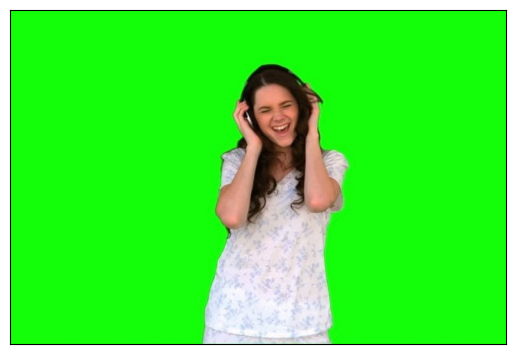

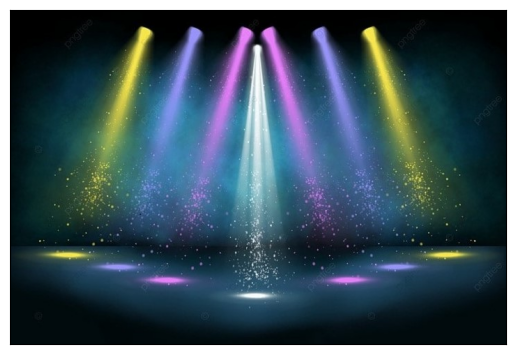

In [23]:
# 이미지 출력
# 인물 이미지
img = cv2.imread('images/chromakey_listen_to_music.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 배경
back = cv2.imread('images/chromakey_music_place.jpg', cv2.IMREAD_COLOR)
back = cv2.cvtColor(back, cv2.COLOR_BGR2RGB)

plt.xticks([]), plt.yticks([])
plt.imshow(img)
plt.show()

plt.xticks([]), plt.yticks([])
plt.imshow(back)
plt.show()

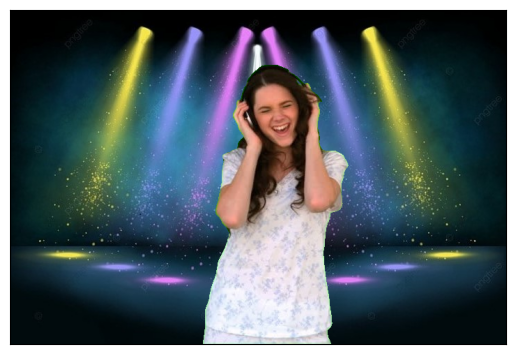

In [25]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# 해당 범위의 영역 검출
mask = cv2.inRange(hsv, (50, 100, 100), (70, 255, 255)) 

# 픽셀 값을 복사하는 함수
cv2.copyTo(back, mask, img)

plt.xticks([]), plt.yticks([])
plt.imshow(img)

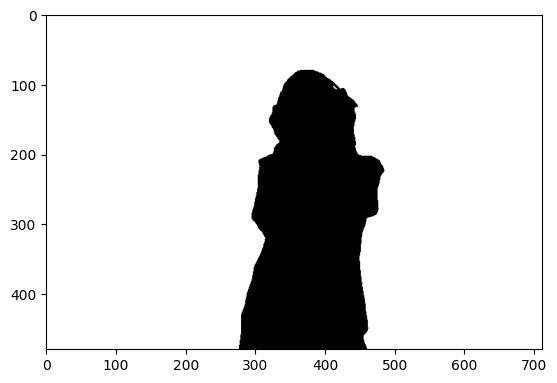

In [ ]:
# 마스크 누끼 딴거 확인해보기
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# 해당 범위의 영역 검출
mask = cv2.inRange(hsv, (50, 100, 100), (70, 255, 255)) 

plt.imshow(mask, cmap='gray')